c班に向けて。
分類のサイズを変えなさい
損失関数変更に対応しなさい
最適化手法変更に対応しなさい

In [1]:
import tqdm
import pandas as pd
import torch
import seaborn as sns
from torch import nn
from torch.utils.data import TensorDataset, DataLoader

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


条件記録変数の初期化

In [2]:
parameters = {}

### データの読み込み
表形式のデータを扱うのに長けた，pandasでデータを読み込む。
pandasにはread_csv()やread_excel()関数があり，一般的な表形式データをそのまま読み込むことができる。

In [3]:
df = pd.read_csv("./data/07C_regression_Material_Propaties.csv")

Jupyter Notebook形式でスクリプトを書いている場合，セルの最終行に変数名だけを記載した場合，その内容が表示される。
その他の場所で表示がしたい場合はprint()関数の使用が必要

In [4]:
df

Standard (Std)  \
0                                                  ANSI   
1                                                  ANSI   
2                                                  ANSI   
3                                                  ANSI   
4                                                  ANSI   
...                                                 ...   
1548                                                JIS   
1549                                                JIS   
1550                                                JIS   
1551                                                JIS   
1552  https://www.kaggle.com/datasets/purushottamnaw...   

     Unique Identification code for the Material (ID)        Material Name  \
0                    D8894772B88F495093C43AF905AB6373       Steel SAE 1015   
1                    05982AC66F064F9EBC709E7A4164613A       Steel SAE 1015   
2                    356D6E63FF9A49A3AB23BF66BAC85DC3       Steel SAE 1015   
3                    1C758F8714AC4E0D9BD8D8AE1625AECD       Steel SAE 1020   
4                    DCE10036FC1946FC8C9108D598D116AD       Steel SAE 1020   
...                                               ...                  ...   
1548                 38526441BA8741CA979DBF870D0B8A9B    Nodular cast iron   
1549                 CAC03D7EB1AA45E68EFF92A2EF4C3D9B    Nodular cast iron   
1550                 45C82A36EC644F8BB6170A99ED819B62  Malleable cast iron   
1551                 BC74F870412F4DDBADDEF1063C1C079F  Malleable cast iron   
1552                                              NaN                  NaN   

     Heat Treatment Method  Ultimate Tensile Strength (Su) in Mpa  \
0                as-rolled                                  421.0   
1               normalized                                  424.0   
2                 annealed                                  386.0   
3                as-rolled                                  448.0   
4               normalized                                  441.0   
...                    ...                                    ...   
1548                   NaN                                  700.0   
1549                   NaN                                  800.0   
1550                   NaN                                  400.0   
1551                   NaN                                  500.0   
1552                   NaN                                    NaN   

      Yield Strength (Sy) in Mpa  \
0                          314.0   
1                          324.0   
2                          284.0   
3                          331.0   
4                          346.0   
...                          ...   
1548                       420.0   
1549                       480.0   
1550                       180.0   
1551                       260.0   
1552                         NaN   

      Elongation at Break or Strain (A5) as a Percentage  \
0                                                  39.0    
1                                                  37.0    
2                                                  37.0    
3                                                  36.0    
4                                                  35.8    
...                                                 ...    
1548                                                NaN    
1549                                                NaN    
1550                                                4.0    
1551                                                4.0    
1552                                                NaN    

      Brinell Hardness Number (BHN) in Microhardness Units  \
0                                                 126.0      
1                                                 121.0      
2                                                 111.0      
3                                                 143.0      
4                                                 131.0      
...                                     

# データの可視化
import seaborn as sns
でインポートしたseabornモジュールを使用して，各数値間の関係を可視化する。

In [5]:
# データの可視化
#sns.pairplot(df)#, hue="age")
#plt.show()

データの加工

In [6]:
# 文字データは数値として入力できないので，該当列名を指定して削除

df = df.drop(columns=[
    "Standard (Std)",
    "Unique Identification code for the Material (ID)",
    "Material Name",
    "Heat Treatment Method",
    "Description of the Material (Desc)"
    ])
#削除できたか確認
df

Ultimate Tensile Strength (Su) in Mpa  Yield Strength (Sy) in Mpa  \
0                                     421.0                       314.0   
1                                     424.0                       324.0   
2                                     386.0                       284.0   
3                                     448.0                       331.0   
4                                     441.0                       346.0   
...                                     ...                         ...   
1548                                  700.0                       420.0   
1549                                  800.0                       480.0   
1550                                  400.0                       180.0   
1551                                  500.0                       260.0   
1552                                    NaN                         NaN   

      Elongation at Break or Strain (A5) as a Percentage  \
0                                                  39.0    
1                                                  37.0    
2                                                  37.0    
3                                                  36.0    
4                                                  35.8    
...                                                 ...    
1548                                                NaN    
1549                                                NaN    
1550                                                4.0    
1551                                                4.0    
1552                                                NaN    

      Brinell Hardness Number (BHN) in Microhardness Units  \
0                                                 126.0      
1                                                 121.0      
2                                                 111.0      
3                                                 143.0      
4                                                 131.0      
...                                                 ...      
1548                                                NaN      
1549                                                NaN      
1550                                                NaN      
1551                                                NaN      
1552                                                NaN      

      Elastic Modulus (E) in Mpa  Shear Modulus (G) in Mpa  \
0                       207000.0                   79000.0   
1                       207000.0                   79000.0   
2                       207000.0                   79000.0   
3                       207000.0                   79000.0   
4                       207000.0                   79000.0   
...                          ...                       ...   
1548                    169000.0                   70000.0   
1549                    169000.0                   70000.0   
1550                    160000.0                   64000.0   
1551                    160000.0                   64000.0   
1552                         NaN                       NaN   

      Poisson's Ratio (mu) in Units of Length  Density (Ro) in Kg/m3  \
0                                        0.30                 7860.0   
1                                        0.30                 7860.0   
2                                        0.30                 7860.0   
3                                        0.30                 7860.0   
4                                        0.30                 7860.0   
...                                       ...                    ...   
1548                                     0.20                 7160.0   
1549                                     0.20                 7160.0   
1550                                     0.27                 7160.0   
1551                                     0.27                 7160.0   
1552                                      NaN                    NaN   

      Pressure at Yield (pH) 

In [7]:
# 欠損値(nan)の確認
df.isnull().sum()

Ultimate Tensile Strength (Su) in Mpa                      1
Yield Strength (Sy) in Mpa                                 1
Elongation at Break or Strain (A5) as a Percentage       207
Brinell Hardness Number (BHN) in Microhardness Units    1090
Elastic Modulus (E) in Mpa                                 1
Shear Modulus (G) in Mpa                                   1
Poisson's Ratio (mu) in Units of Length                    1
Density (Ro) in Kg/m3                                      1
Pressure at Yield (pH) in Mpa                           1360
Vickers Hardness Number (HV)                            1388
dtype: int64

In [8]:
# 欠損値の多い列を削除
df = df.drop(columns=[
    "Elongation at Break or Strain (A5) as a Percentage",
    "Brinell Hardness Number (BHN) in Microhardness Units",
    "Pressure at Yield (pH) in Mpa",
    "Vickers Hardness Number (HV)"
])
df.dropna(inplace=True)
df

Ultimate Tensile Strength (Su) in Mpa  Yield Strength (Sy) in Mpa  \
0                                     421.0                       314.0   
1                                     424.0                       324.0   
2                                     386.0                       284.0   
3                                     448.0                       331.0   
4                                     441.0                       346.0   
...                                     ...                         ...   
1547                                  600.0                       370.0   
1548                                  700.0                       420.0   
1549                                  800.0                       480.0   
1550                                  400.0                       180.0   
1551                                  500.0                       260.0   

      Elastic Modulus (E) in Mpa  Shear Modulus (G) in Mpa  \
0                       207000.0                   79000.0   
1                       207000.0                   79000.0   
2                       207000.0                   79000.0   
3                       207000.0                   79000.0   
4                       207000.0                   79000.0   
...                          ...                       ...   
1547                    169000.0                   70000.0   
1548                    169000.0                   70000.0   
1549                    169000.0                   70000.0   
1550                    160000.0                   64000.0   
1551                    160000.0                   64000.0   

      Poisson's Ratio (mu) in Units of Length  Density (Ro) in Kg/m3  
0                                        0.30                 7860.0  
1                                        0.30                 7860.0  
2                                        0.30                 7860.0  
3                                        0.30                 7860.0  
4                                        0.30                 7860.0  
...                                       ...                    ...  
1547                                     0.20                 7160.0  
1548                                     0.20                 7160.0  
1549                                     0.20                 7160.0  
1550                                     0.27                 7160.0  
1551                                     0.27                 7160.0  

[1552 rows x 6 columns]

In [9]:
# 文字列データを数値に変換
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].astype('float')

## データを訓練・テストに分割
データ全てを使って訓練すると，過学習（問題集の丸暗記に近い状態）となり，初めて見るデータに対する推測性能を知ることができない。
整形したデータの２割を，テストデータ，８割を訓練データとして分割する。

In [10]:
# 回帰（推定）対象を除いたデータをX，回帰対象をyとして分ける
parameters["regression_terget"] = "Elastic Modulus (E) in Mpa"
X = df.drop(parameters.get("regression_terget"), axis=1)
y = df[parameters.get("regression_terget")]

# 分割の再現性を確保するため，シード値を指定したうえで訓練データ・テストデータに分割（ここは変えない）
parameters["test_size"] = 0.2
parameters["random_seed"] = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=parameters.get("test_size"),
                                                    random_state=parameters.get("random_seed"))


分割結果の確認

In [11]:
X_train

Ultimate Tensile Strength (Su) in Mpa  Yield Strength (Sy) in Mpa  \
295                                   379.0                       172.0   
517                                   310.0                       159.0   
656                                   750.0                       490.0   
1309                                  569.0                       334.0   
686                                   400.0                       240.0   
...                                     ...                         ...   
763                                   880.0                       670.0   
835                                   450.0                       360.0   
1216                                  600.0                       360.0   
559                                   400.0                       379.0   
684                                   700.0                       500.0   

      Shear Modulus (G) in Mpa  Poisson's Ratio (mu) in Units of Length  \
295                    40000.0                                     0.32   
517                    26000.0                                     0.33   
656                    80000.0                                     0.30   
1309                   85000.0                                     0.29   
686                    80000.0                                     0.30   
...                        ...                                      ...   
763                    80000.0                                     0.30   
835                    80000.0                                     0.30   
1216                   82000.0                                     0.30   
559                    26000.0                                     0.33   
684                    80000.0                                     0.30   

      Density (Ro) in Kg/m3  
295                  8800.0  
517                  2700.0  
656                  7860.0  
1309                 7820.0  
686                  7860.0  
...                     ...  
763                  7860.0  
835                  7860.0  
1216                 7850.0  
559                  2700.0  
684                  7860.0  

[1241 rows x 5 columns]

In [12]:
X_test.shape

(311, 5)

In [13]:
y_train.shape

(1241,)

In [14]:
y_test.shape

(311,)

## データをpytorch用に変換
データを変換し，モデルが読み込めるようにデータローダーを定義する。

In [15]:
# torchテンソルに変換
X_train = torch.tensor(X_train.values, dtype=torch.float)
X_test = torch.tensor(X_test.values, dtype=torch.float)
y_train = torch.tensor(y_train.values, dtype=torch.float).view(-1, 1)
y_test = torch.tensor(y_test.values, dtype=torch.float).view(-1, 1)

# データローダー定義用に変換
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

# データローダー定義
parameters["batch_size"] = 16
train_loader = DataLoader(train_dataset, batch_size=parameters.get('batch_size'), shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)


In [16]:
# テンソル形状の確認
for batch, (X, y) in enumerate(train_loader):
    pass
print(f"batch: {batch}, X: {X.shape}, y: {y.shape}")

batch: 77, X: torch.Size([9, 5]), y: torch.Size([9, 1])


## モデルの定義
モデルの定義自体は基本的に前回の分類問題と同様。
変更するのは，入出力データのサイズ。

### 前回の入出力サイズ
入力：縦横28ピクセルのモノクロ画像データのため，１ピクセル毎の輝度データが入力，つまり28×28=784個の数値を入力とした。

出力：10種類の衣類の種類それぞれの確率を数字としたため，10個の数字が出力

### 今回の入出力サイズ
入力：各列のパラメータが対応するため，数値8個を入力する。X.shape[1]は行列の幅を返す。

出力：回帰対象，つまり単一の数値が出力


In [17]:
input_size = X.shape[1]
output_size = 1

In [18]:
# 訓練に際して、可能であればGPU（cuda）を設定します。GPUが搭載されていない場合はCPUを使用します
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))


# modelを定義します
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.LeakyReLU(),
            nn.Linear(256, 256),
            nn.LeakyReLU(),
            nn.Linear(256, output_size),
            nn.LeakyReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

# モデルのインスタンスを作成
train_error = []; test_error = []; total_epochs = 0
parameters['model'] = NeuralNetwork(input_size=input_size, output_size=output_size).to(device)
model = parameters.get('model')
print(parameters['model'])

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=5, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): LeakyReLU(negative_slope=0.01)
  )
)


## 訓練条件の指定
損失関数，最適化アルゴリズムを指定する。
前回と違うのは，損失関数が単純に数値の誤差のため，MSELoss()を使用する点


In [19]:
parameters['loss_fn'] = nn.MSELoss()
parameters['learning_rate'] = 1e-3
parameters['optimizer'] = torch.optim.Adam(model.parameters(), lr=parameters['learning_rate'])

loss_fn = parameters.get('loss_fn')
optimizer = parameters['optimizer']

#学習スケジューラーを入れる場合はここに記述
parameters['scheduler'] = torch.optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.1)
scheduler = parameters['scheduler']

In [20]:
def train(dataloader, model, loss_fn, optimizer, scheduler = None):

    model.train()
    RMSE = 0; size = 0

    for batch, (X, y) in enumerate(dataloader):
        size += 1
        X, y = X.to(device), y.to(device)
        
        # 損失誤差を計算
        pred = model(X)
        loss = loss_fn(pred, y)
        buf_fn = nn.MSELoss(); RMSE += buf_fn(pred, y).item()        
        
        # バックプロパゲーション
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


    RMSE /= size
    RMSE = RMSE**0.5

    if scheduler is not None:
        try:
            scheduler.step(loss)
        except:
            scheduler.step

    return RMSE

def test(dataloader, model, loss_fn, monitor = False, range = (0,1)):
    size = 0; RMSE = 0
    model.eval()

    if monitor:
        predictions = []
        truths = []

    with torch.no_grad():
        for X, y in dataloader:
            size += 1
            X, y = X.to(device), y.to(device)
            pred = model(X)

            if monitor:
                predictions.append(pred)
                truths.append(y)

            buf_fn = nn.MSELoss(); RMSE += buf_fn(pred, y).item()        
            
    RMSE /= size
    RMSE = RMSE**0.5

    if monitor:
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        predictions = torch.cat(predictions).cpu().numpy()
        truths = torch.cat(truths).cpu().numpy()
        print(range)
        plt.plot([range[0],range[1]], [range[0],range[1]], color = "black")
        plt.plot(truths, predictions, "o", color = "black", alpha = 0.5)
        plt.xlabel(f"True")
        plt.ylabel(f"Predicted")
        #rmseをテキストとして枠内に表示
        plt.text(0.05, 0.95, f"RMSE: {RMSE:.2f}", transform=plt.gca().transAxes)
        plt.subplot(1, 2, 2)
        ax2 = plt.gca()
        
        # 表示するテキストを作成
        text = ""
        for key, value in parameters.items():
            if key == 'optimizer':
                value =  str(value)[:5]
            text += f"{key}: {value}\n"

        # Subplot内にテキストを追加
        plt.text(0, 1, text, transform=ax2.transAxes, fontsize=10, verticalalignment='top')

        # グラフのタイトルなどを必要に応じて設定
        plt.title("Parameters")
        plt.axis('off') # 軸を非表示にする

        plt.show()
        
    return RMSE

In [21]:
parameters['epochs'] = 300
total_epochs += parameters['epochs']

for t in tqdm.tqdm(range(parameters['epochs'])):
    train_error.append(train(train_loader, model, loss_fn, optimizer))
    test_error.append(test(test_loader, model, loss_fn))
    
print("完了")
print(train_error)

100%|██████████| 300/300 [00:41<00:00,  7.29it/s]

完了
[136105.418762867, 105674.63050471334, 47520.969984920266, 30779.267314383174, 28472.47351570573, 28963.23462598748, 25841.565146692825, 25378.156037154353, 26622.91302715167, 26251.295024465715, 33145.982574371104, 35067.13561595375, 20884.784249022185, 20663.397183897112, 20060.596386563768, 17227.473093274217, 20063.742032805705, 18405.29969524525, 25841.071648612367, 18431.294687193134, 15830.652985544151, 12884.0866545936, 13665.91979041106, 11794.43565350269, 17429.746830913627, 12052.035615910678, 12518.181662214569, 10392.657717633994, 24312.78880943747, 20376.328260621816, 29065.396089614085, 7811.844511168068, 16644.972163019447, 37105.502992765825, 12739.102871142004, 7696.631215701635, 8015.959399207533, 6532.744064052276, 8916.65206516897, 23862.977287539816, 17755.79755897009, 6771.955063925078, 7297.7782020213135, 6973.044733297221, 28446.388198364504, 38048.25805874018, 26121.814320184676, 9014.579890164257, 6577.322097507387, 10039.687064793123, 7388.341265822553, 8

## 学習曲線の可視化

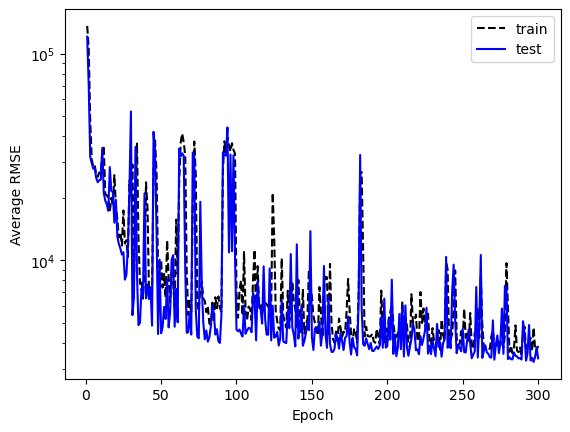

In [22]:

plt.plot(range(1,total_epochs+1), train_error, label="train", color="black", linestyle="dashed")
plt.plot(range(1,total_epochs+1), test_error, label="test", color="blue")
plt.xlabel("Epoch")
plt.ylabel("Average RMSE")
plt.yscale('log')
plt.legend()
plt.show()


train data prediction
(np.float64(73000.0), np.float64(219000.0))


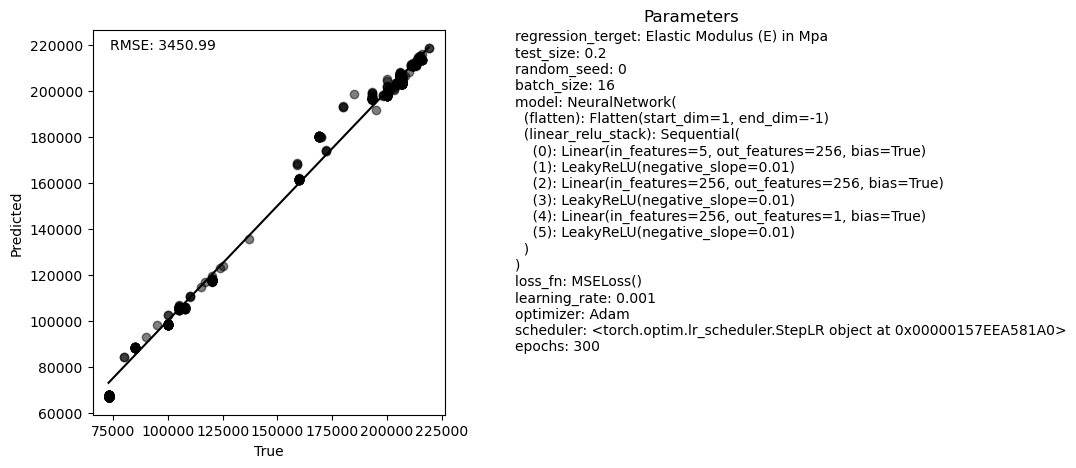

test data prediction
(np.float64(73000.0), np.float64(219000.0))


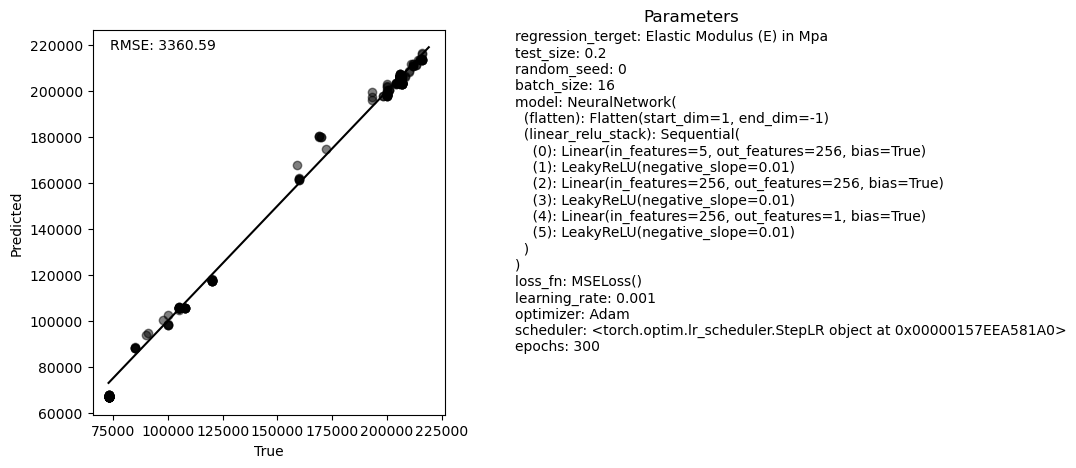

3360.5948878137633

In [23]:
# 訓練データに対する予測結果を表示
print("train data prediction")
test(train_loader, model, loss_fn, monitor=True, range = (df[parameters['regression_terget']].min(), df[parameters['regression_terget']].max()))
# テストデータに対する予測結果を表示
print("test data prediction")
test(test_loader, model, loss_fn, monitor=True, range = (df[parameters['regression_terget']].min(), df[parameters['regression_terget']].max()))

## 精度向上へのヒント
1. データの前処理は正しかったか？
    1. 列によって値のレンジが異なるが，これを同じように入力しても大丈夫？
    1. 合金の名前を削除したが，文字列のデータ（カテゴリデータ）はヒントとして使えないか
    
1. 学習量（epoch数）は充分か？
    1. 学習曲線におけるテストデータの誤差が減少傾向であれば，学習不足。
    1. テストデータよりも訓練データに対する誤差が大きい場合も，学習不足の可能性が高い。

1. 学習速度係数(lr)は適切か？
    1. 大きいと収束は早いが安定しにくい。
    1. 小さいと収束結果はいいが学習が遅い。
    1. 学習の途中で学習係数を調整するスケジューラーも存在する（from torch.optim import lr_scheduler）
    
1. batch_sizeは？
    1. 一度に見せるデータの量，基本的には小さい方が高精度とされる
    1. が，小さいと訓練回数が増えるので，学習に時間がかかる。

1. モデルの表現力（層の数やニューロンの数）は適切だったか？
    1. 表現力が不足していると，データ全てを包括した特徴を充分に抽出できない。この場合，学習曲線で訓練データの誤差が一定値以上減らなくなる。
    1. 表現力が過剰な場合，過学習（訓練データを丸暗記し，テスト結果が悪くなる）に陥りやすい。この場合，学習曲線において訓練データに対する誤差が減っているにも関わらず，テストデータに対する誤差が増えていく。

1. 活性層は？
    1. Reluは負の値に対して，学習ができない。
    1. LeakyReluは負の値にも傾きがある。

1. 損失関数は適切だったか？回帰における誤差評価関数には例えば以下のような種類がある。
    1. MSE（Mean Squared Error/2乗平均誤差）：正規分布の分散に相当する。2乗を取ることで本来の値から離れるほど非線形にペナルティが大きくなる
    1. RMSE（Root Mean Squared Error/2乗平均平方根誤差）：正規分布の標準偏差に相当する。本来の値からの距離に対して線形にペナルティを与える。
    1. MAE（Mean Absolute Error/平均絶対値誤差）：誤差自体の平均値
    1. LMSE(Least Mean Square Error/最小2乗平均誤差)：MSEの対数をとった関数。誤差を対数軸（比率）で評価可能になるので，何桁にも渡って分布する（対数軸で評価する）回帰対象に対して適用しやすい。
    

## 同条件でのスコア統計取得
モデルの初期パラメータは，乱数で決定される。ので，同じ方法での訓練でも結果はばらつく。複数回の評価で，本質的に優れた方法かが評価できる。

(np.float64(73000.0), np.float64(219000.0))


1/30: train_RMSE: 3466.84, test_RMSE: 4161.58(np.float64(73000.0), np.float64(219000.0))


2/30: train_RMSE: 3658.10, test_RMSE: 3279.69(np.float64(73000.0), np.float64(219000.0))


3/30: train_RMSE: 3507.11, test_RMSE: 3343.56(np.float64(73000.0), np.float64(219000.0))


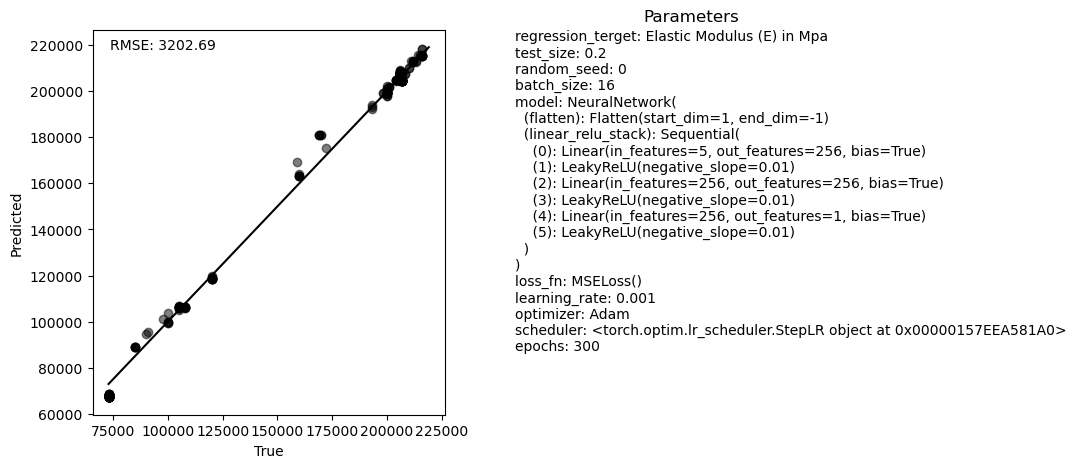

4/30: train_RMSE: 3604.64, test_RMSE: 3202.69(np.float64(73000.0), np.float64(219000.0))


5/30: train_RMSE: 3646.12, test_RMSE: 3480.98(np.float64(73000.0), np.float64(219000.0))


6/30: train_RMSE: 4296.28, test_RMSE: 5093.68(np.float64(73000.0), np.float64(219000.0))


7/30: train_RMSE: 4566.99, test_RMSE: 4340.84(np.float64(73000.0), np.float64(219000.0))


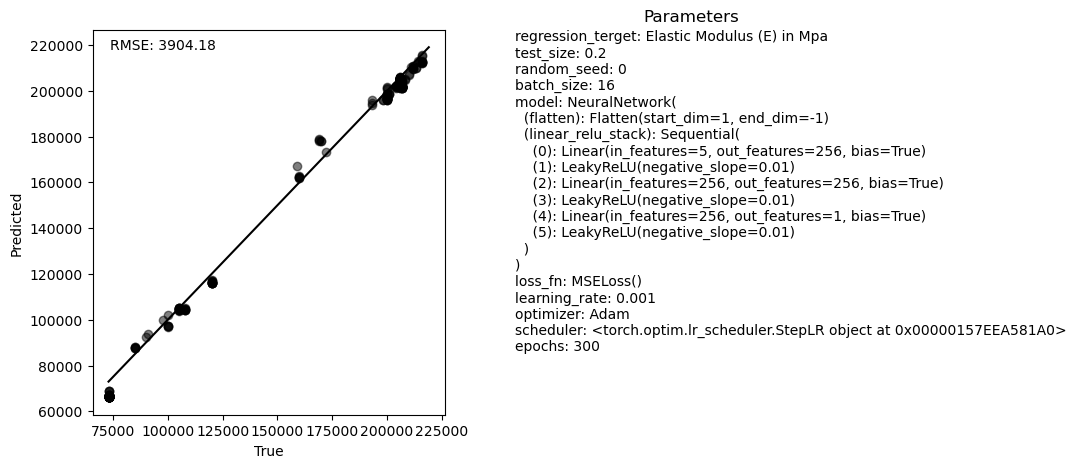

8/30: train_RMSE: 3577.68, test_RMSE: 3904.18(np.float64(73000.0), np.float64(219000.0))


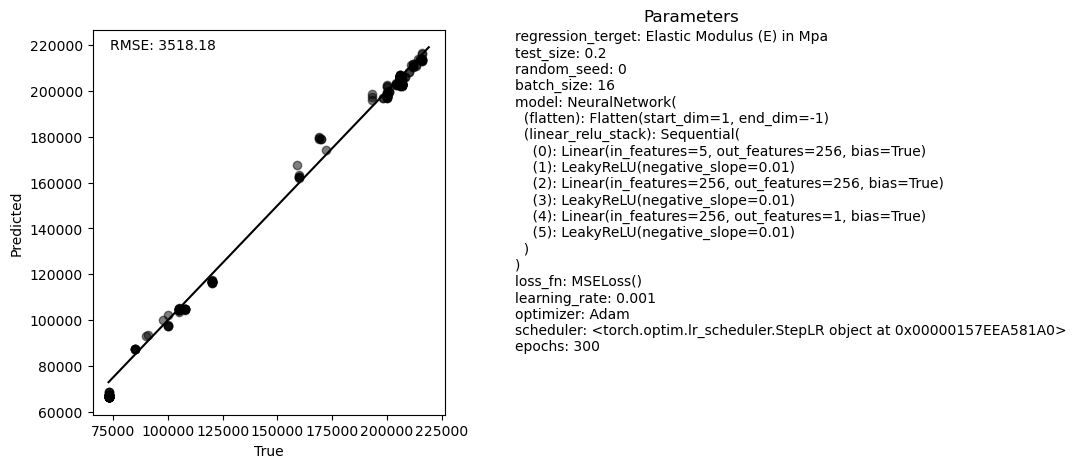

9/30: train_RMSE: 3792.11, test_RMSE: 3518.18(np.float64(73000.0), np.float64(219000.0))


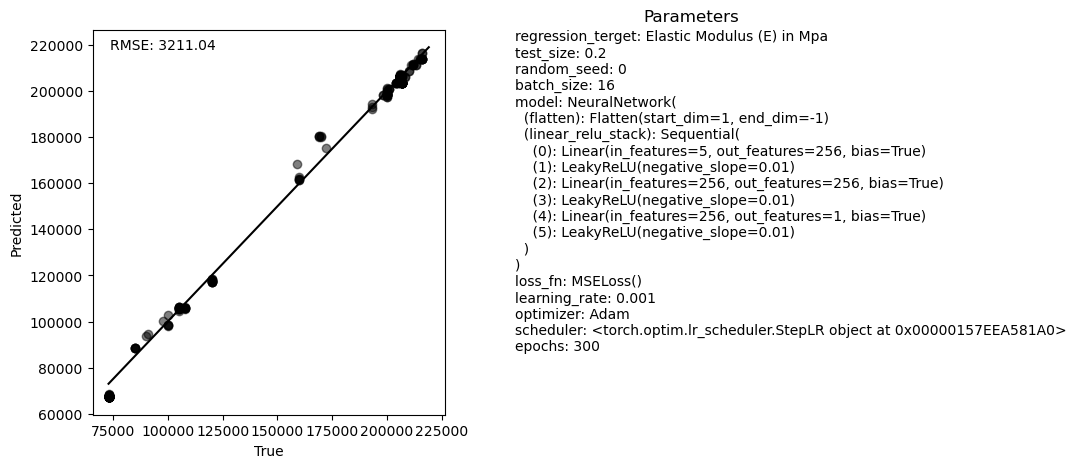

10/30: train_RMSE: 3409.36, test_RMSE: 3211.04(np.float64(73000.0), np.float64(219000.0))


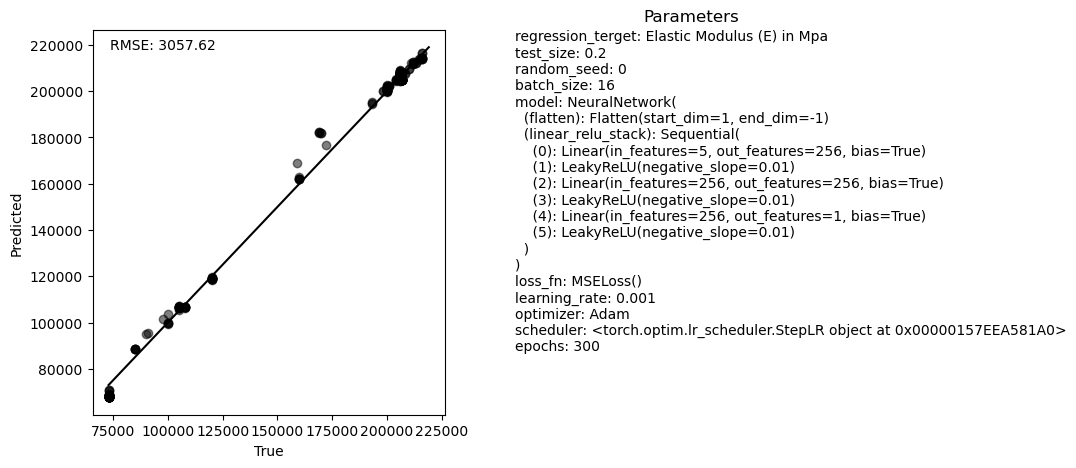

11/30: train_RMSE: 3395.14, test_RMSE: 3057.62(np.float64(73000.0), np.float64(219000.0))


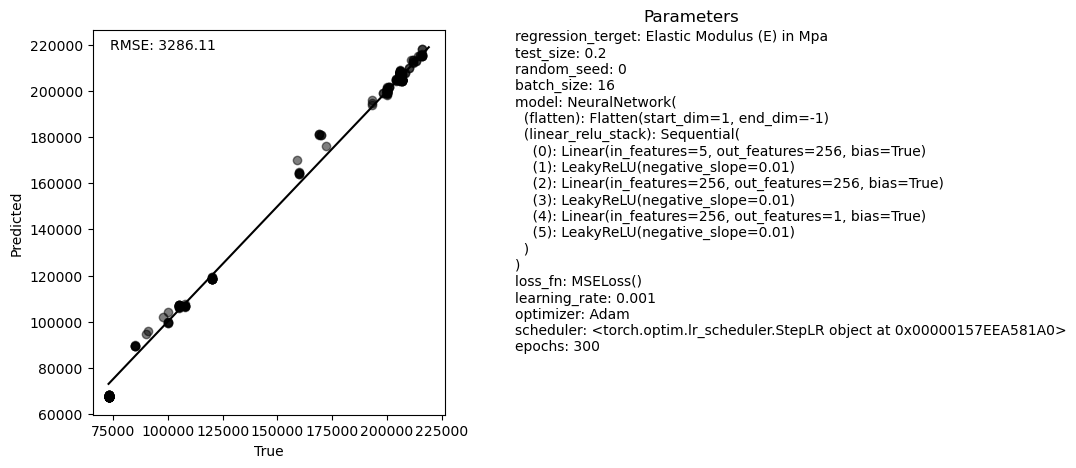

12/30: train_RMSE: 3666.85, test_RMSE: 3286.11(np.float64(73000.0), np.float64(219000.0))


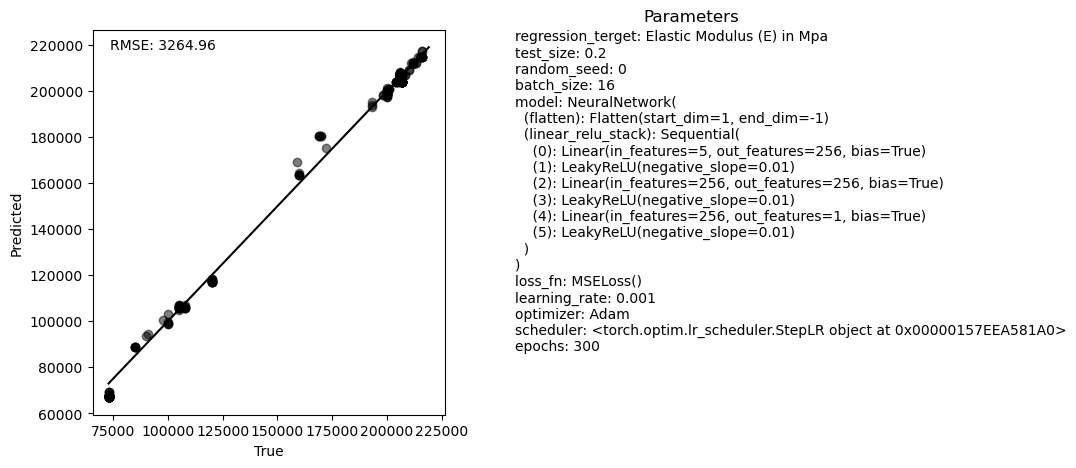

13/30: train_RMSE: 3496.95, test_RMSE: 3264.96(np.float64(73000.0), np.float64(219000.0))


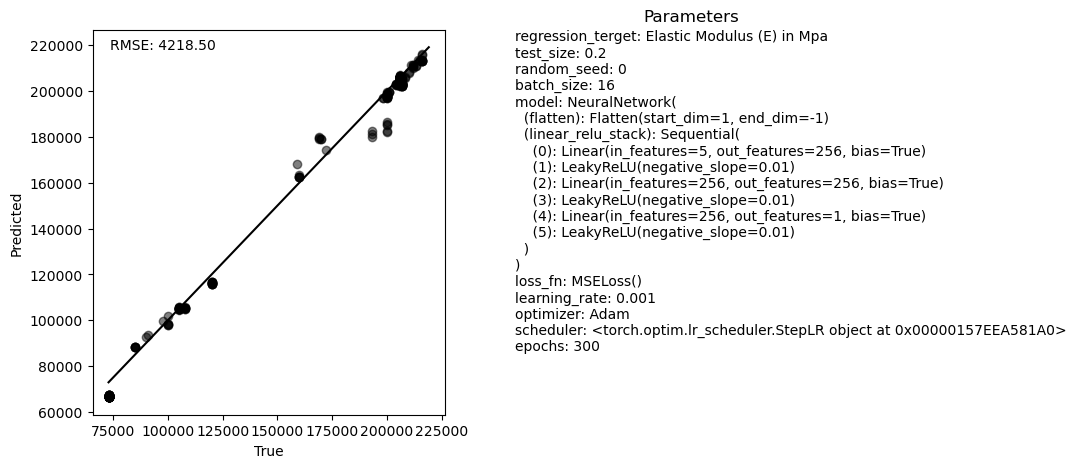

14/30: train_RMSE: 4022.77, test_RMSE: 4218.50(np.float64(73000.0), np.float64(219000.0))


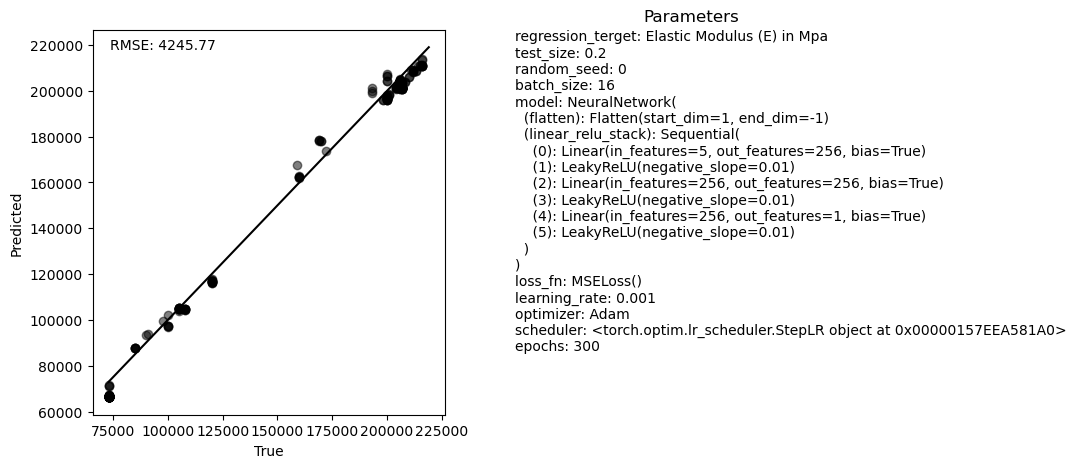

15/30: train_RMSE: 3863.22, test_RMSE: 4245.77(np.float64(73000.0), np.float64(219000.0))


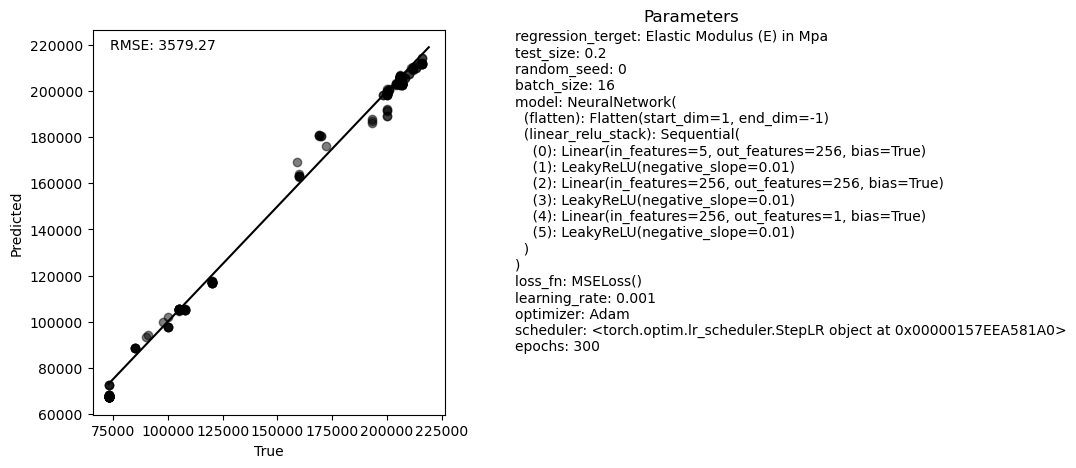

16/30: train_RMSE: 3497.96, test_RMSE: 3579.27(np.float64(73000.0), np.float64(219000.0))


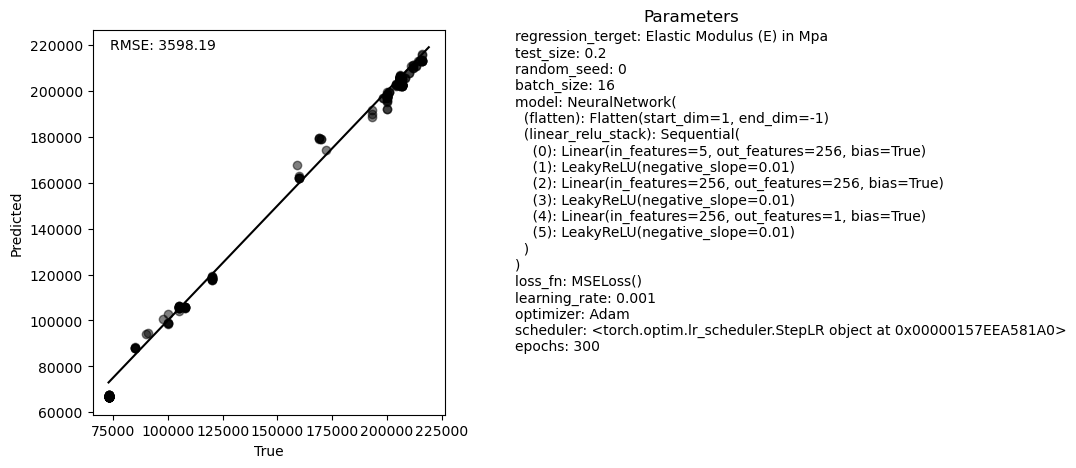

17/30: train_RMSE: 3628.61, test_RMSE: 3598.19(np.float64(73000.0), np.float64(219000.0))


18/30: train_RMSE: 3598.83, test_RMSE: 3450.50(np.float64(73000.0), np.float64(219000.0))


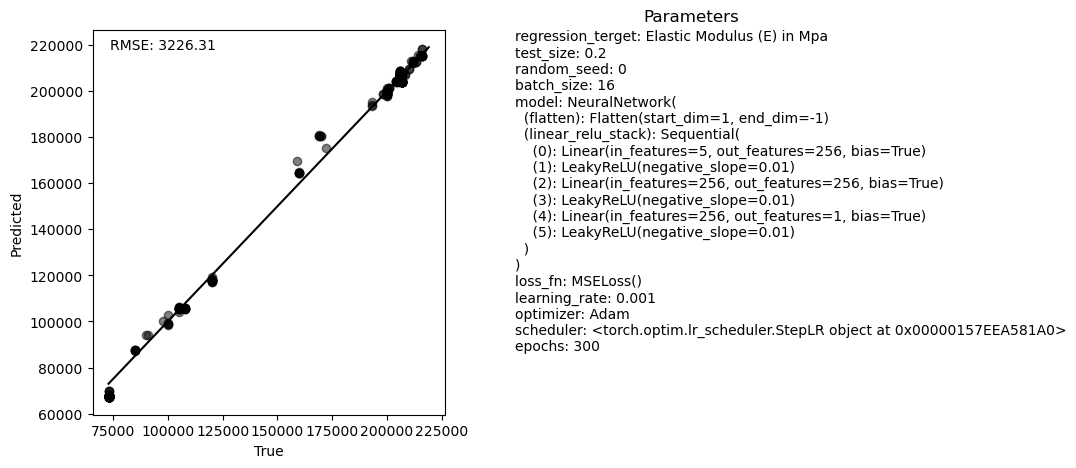

19/30: train_RMSE: 3577.02, test_RMSE: 3226.31(np.float64(73000.0), np.float64(219000.0))


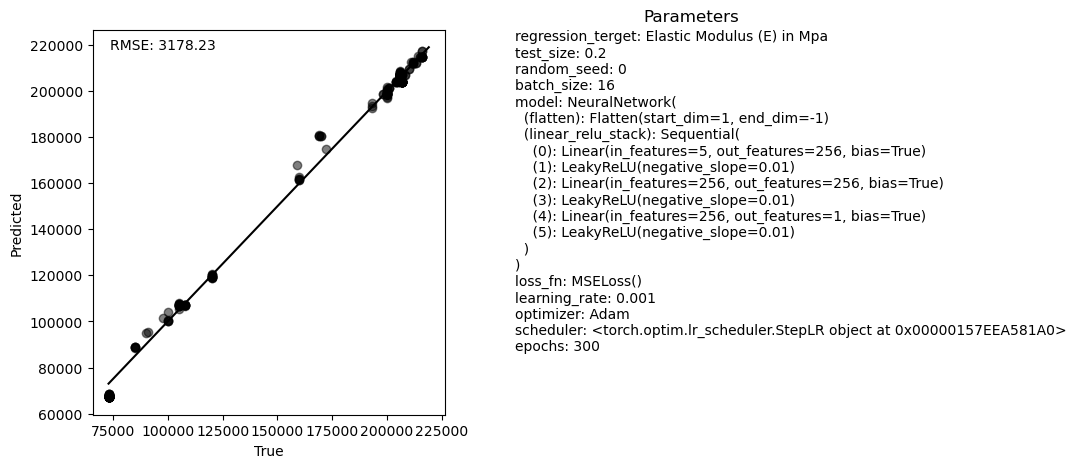

20/30: train_RMSE: 3408.03, test_RMSE: 3178.23(np.float64(73000.0), np.float64(219000.0))


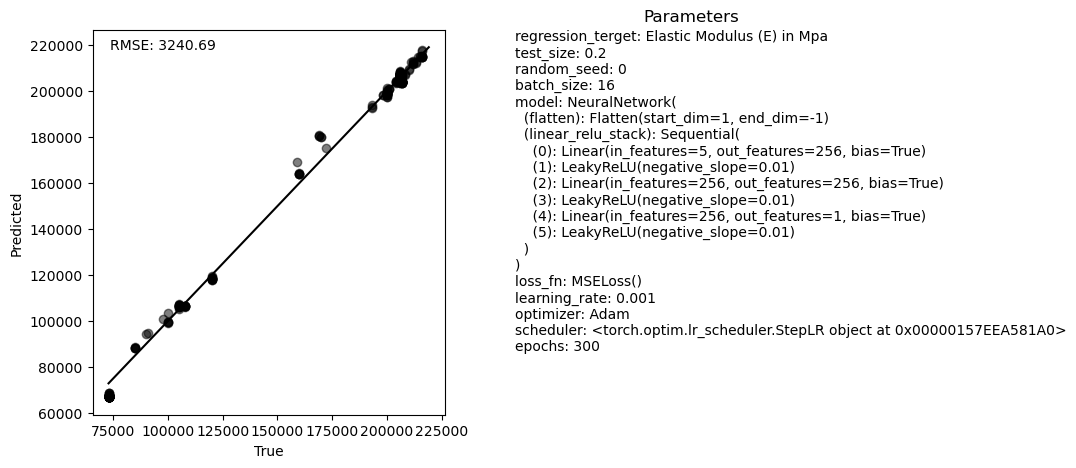

21/30: train_RMSE: 3476.59, test_RMSE: 3240.69(np.float64(73000.0), np.float64(219000.0))


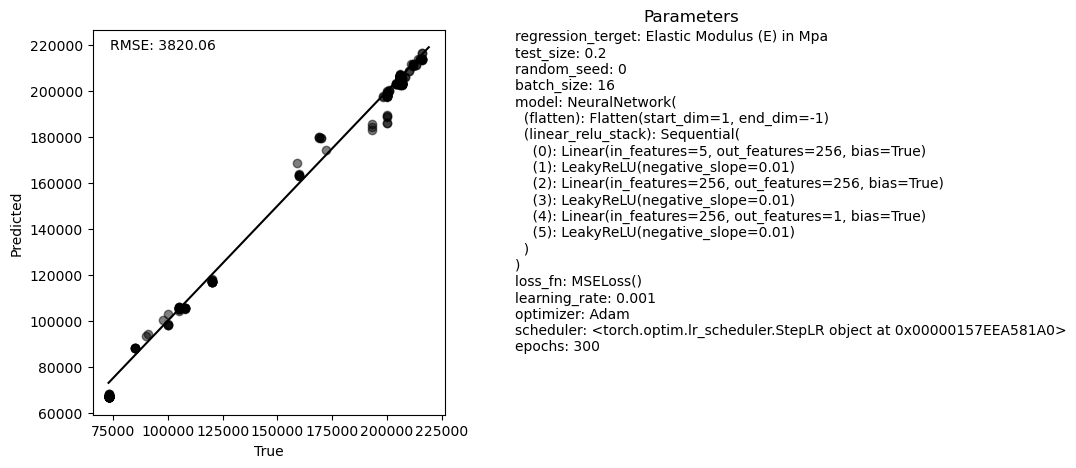

22/30: train_RMSE: 3707.81, test_RMSE: 3820.06(np.float64(73000.0), np.float64(219000.0))


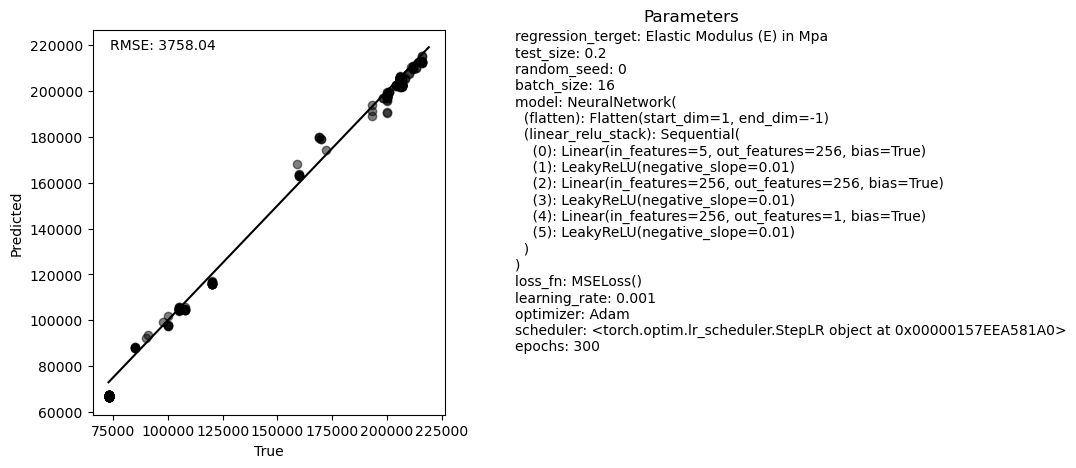

23/30: train_RMSE: 3718.62, test_RMSE: 3758.04(np.float64(73000.0), np.float64(219000.0))


24/30: train_RMSE: 3390.70, test_RMSE: 3379.48(np.float64(73000.0), np.float64(219000.0))


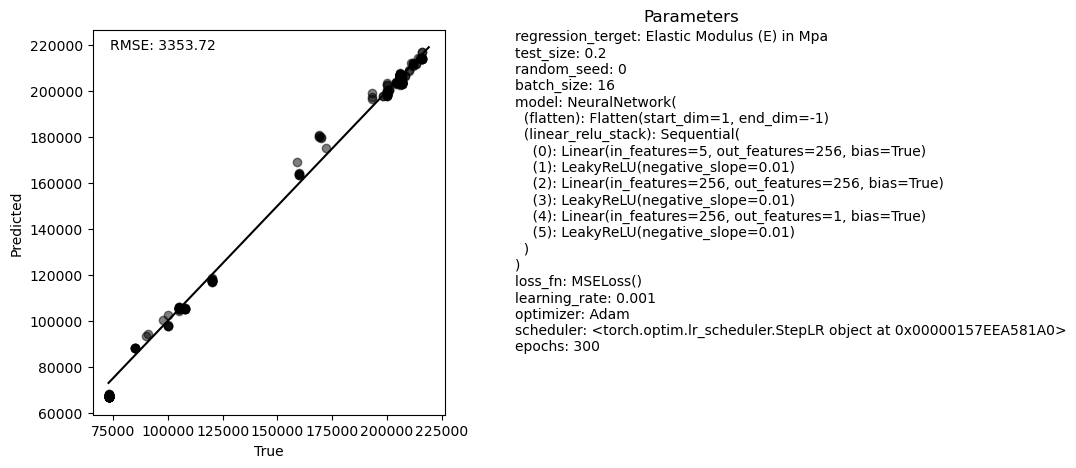

25/30: train_RMSE: 3560.53, test_RMSE: 3353.72(np.float64(73000.0), np.float64(219000.0))


26/30: train_RMSE: 3706.79, test_RMSE: 3279.72(np.float64(73000.0), np.float64(219000.0))


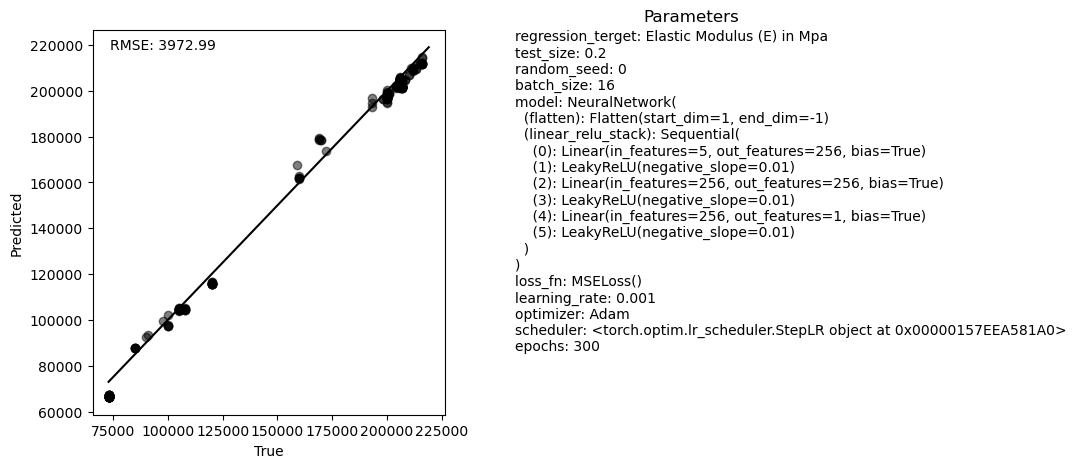

27/30: train_RMSE: 3897.20, test_RMSE: 3972.99(np.float64(73000.0), np.float64(219000.0))


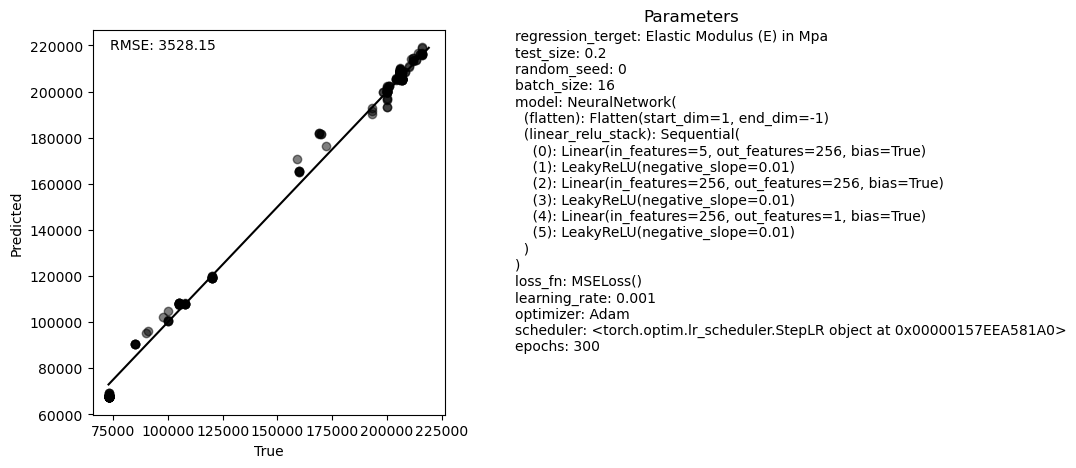

28/30: train_RMSE: 3866.37, test_RMSE: 3528.15(np.float64(73000.0), np.float64(219000.0))


29/30: train_RMSE: 3596.56, test_RMSE: 4037.67(np.float64(73000.0), np.float64(219000.0))


30/30: train_RMSE: 3780.55, test_RMSE: 5961.06

In [24]:
n = 30
errors = []
for i in range(n):
    parameters['model'] = NeuralNetwork(input_size=input_size, output_size=output_size).to(device)
    model = parameters.get('model')
    parameters['optimizer'] = torch.optim.Adam(model.parameters(), lr=parameters['learning_rate'])
    optimizer = parameters['optimizer']
    #学習スケジューラーを入れる場合はここに記述

    for t in range(parameters['epochs']):
        train_RMSE = train(train_loader, model, loss_fn, optimizer)
    test_RMSE = test(test_loader, model, loss_fn, monitor = True, range = (df[parameters['regression_terget']].min(), df[parameters['regression_terget']].max()))
    errors.append((train_RMSE, test_RMSE))

    print(f"\r{i+1}/{n}: train_RMSE: {train_RMSE:.2f}, test_RMSE: {test_RMSE:.2f}", end='')

(30, 2)


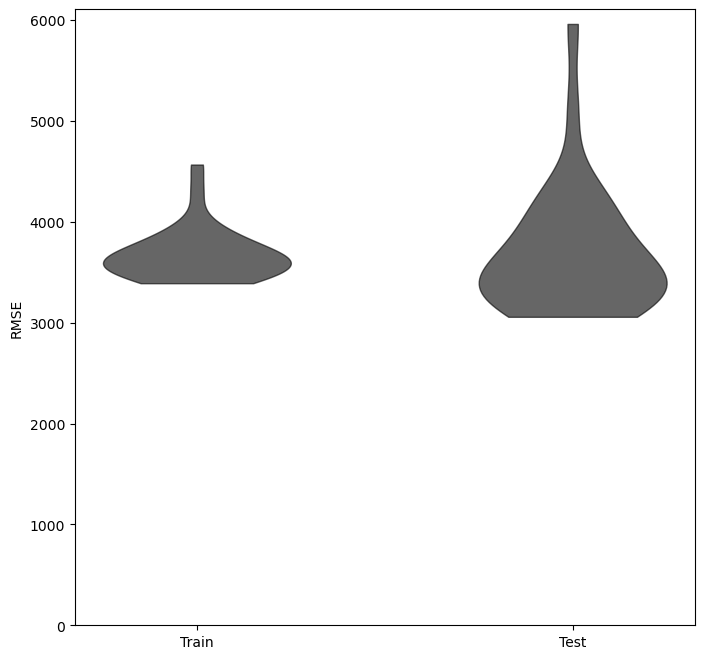

In [25]:
# 繰り返した結果のバイオリンプロットを表示
error = torch.tensor(errors)
error = error.cpu().numpy()
error = error 
print(error.shape)
fig, ax = plt.subplots(figsize=(8,8))
vio = ax.violinplot(error, showmeans=False, showextrema=False, showmedians=False)
ax.set_xticks([1,2], labels=["Train", "Test"])
for body in vio['bodies']:
    body.set_color('black')
    body.set_alpha(0.6)
plt.ylabel("RMSE")
plt.ylim(0, )
plt.show()

In [26]:
# RMSEの統計をcsvに保存
df_error = pd.DataFrame(errors, columns=["Train", "Test"])

# 日付と時刻を取得
from datetime import datetime
now = datetime.now()
timestamp = now.strftime("%Y%m%d_%H%M%S")
df_error.to_csv(f"./data/RMSE_{timestamp}.csv")



ここまでを実行すると，繰り返し学習した結果における誤差（RMSE）の分布が"./data/RMSE_{timestamp}.csv"として記録される。

次に，条件を変えた際の筆画を行う。

In [31]:
df_ref = pd.read_csv("./data/RMSE_of_Initial_Conditions.csv")

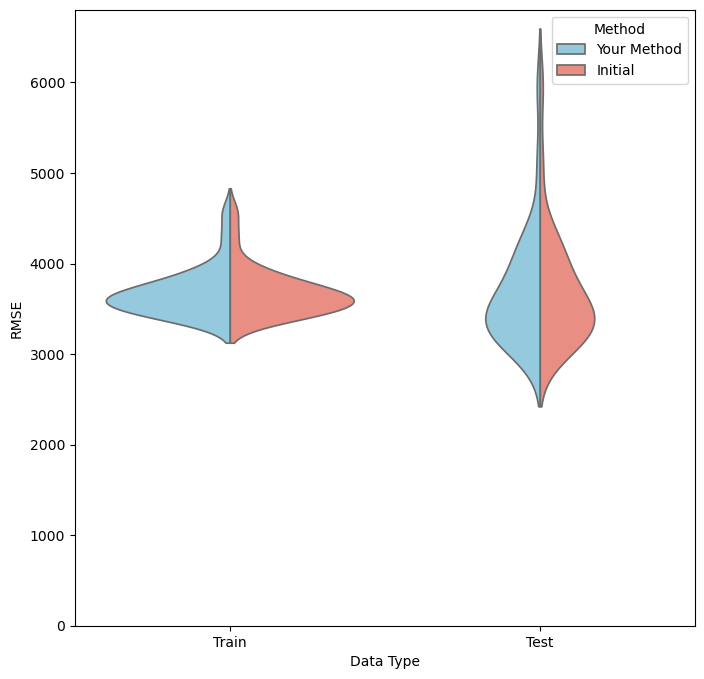

In [32]:
#比較用に整形
df_ref = pd.read_csv("./data/RMSE_of_Initial_Conditions.csv")
df_ref_train = pd.DataFrame({'RMSE': df_ref['Train']})
df_ref_train['Data Type'] = 'Train'
df_ref_test = pd.DataFrame({'RMSE': df_ref['Test']})
df_ref_test['Data Type'] = 'Test'
df_ref_combined = pd.concat([df_ref_train, df_ref_test])
df_ref_combined['Method'] = 'Initial'

df_error_train = pd.DataFrame({'RMSE': df_error['Train']})
df_error_train['Data Type'] = 'Train'
df_error_test = pd.DataFrame({'RMSE': df_error['Test']})
df_error_test['Data Type'] = 'Test'
df_error_combined = pd.concat([df_error_train, df_error_test])
df_error_combined['Method'] = 'Your Method'

df_combined = pd.concat([df_error_combined, df_ref_combined])

#比較
f,ax=plt.subplots(figsize=(8,8))
sns.violinplot(x= "Data Type",y="RMSE",hue="Method", data=df_combined, split=True, ax=ax, inner=None, palette=["skyblue", "salmon"])
ax.set_ylabel("RMSE")
ax.set_ylim(0,)
plt.show()


In [29]:
df_combined

RMSE Data Type       Method
0   3466.840503     Train  Your Method
1   3658.104346     Train  Your Method
2   3507.109599     Train  Your Method
3   3604.639533     Train  Your Method
4   3646.122637     Train  Your Method
..          ...       ...          ...
25   195.571299      Test      Initial
26   674.846209      Test      Initial
27   194.185277      Test      Initial
28   674.846209      Test      Initial
29   674.846209      Test      Initial

[120 rows x 3 columns]

### プレゼンに向けて
与えられたコードを改良し, データに対する回帰の精度を向上させ, 結果を2分のプレゼンテーションで説明せよ​。スライドには変更点と実験結果の説明を含めること​。例えば以下のような変更点が考えられる​。

1. 学習条件（エポック数, 学習係数, バッチサイズ)​

1. モデル条件（層の種別, 組み合わせ, モデルの構造)​

1. 前処理に関する変更点（正規化, 情報の種別）​

### 実験結果には以下のものを含めること​

1. テストデータに対するyyplot​

1. 改善後のRMSE値（可能であればバイオリンプロット）​

1. 結果に対する考察​


In [30]:
from IPython.display import SVG, display
display(SVG("./figure/ルーブリック2.svg"))


ExpatError: not well-formed (invalid token): line 1, column 1